# What is Part-of-Speech tag?

- Part-of-Speech: 
    - grammatical / lexical category of a word
        - Verb, Noun, Adjective, Adverb, Article, etc.

- POS tagging:
    - tag each word with an appropriate POS tag within a context
    - POS gives information about the word itself and its neighbors
    - "book a ticket", book: verb
    - "book of the century", book: noun
    - disambiguate the meaning without parsing
    
<br>

- Why do we need Part-of-Speech tag?
    - NLP pipeline: 
        - tokenization
        - tagging
    - intermediate step for higher-level NLP tasks:
        - grammar analysis
        - spell-checking
        - information retrieval
        - information extraction
        - parsing 
        - semantics analysis 
        - translation
        - linguistic research for corpora
        - Text to Speech (TTS) applications
        - grammarly
        - disambiguiation
    

<img src="./outline.png" width="400" align="left">

## Tagset
    - the collection of POS tags
    - typically language specific
    - may be more or less granular
    - not all NLTK corpora employ the same tagset

<img src="./tagset.png" width="600" align="left">

- Universal POS tagset:

<img src="./Universal_tagset.png" width="600" align="left">

- BNC POS tagset:
  
<img src="./BNC_tagset1.png" width="800" align="left">


<img src="./BNC_tagset2.png" width="800" align="left">

## Explore NLTK tagged corpora

In [1]:
import nltk
nltk.data.path.append("/data/3/zwang/nltk_data") # setting environment variable to your path

# show the plot in file
from matplotlib import pyplot as plt
plt.style.use('default')

Not all NLTK corpora employ the same tagset

In [2]:
nltk.corpus.nps_chat.tagged_words()

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]

In [3]:
nltk.corpus.nps_chat.tagged_words(tagset = 'universal')

[('now', 'ADV'), ('im', 'PRON'), ('left', 'VERB'), ...]

Explore the tagged brown corpora

In [4]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common() # the most common POS tags for the news category of brown corpora

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

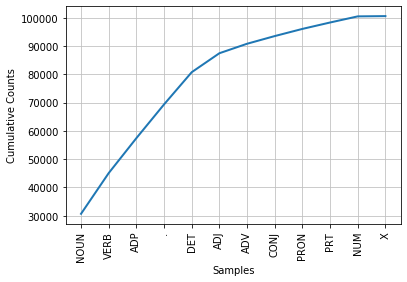

In [5]:
# top-5 most commonly used tags almost cover 80% of the words' POS tags
tag_fd.plot(cumulative=True)

Check POS tag for a given word

In [10]:
word_tag_pairs = nltk.corpus.treebank.tagged_words(tagset='universal')
conditional_fd = nltk.ConditionalFreqDist(word_tag_pairs)

In [11]:
conditional_fd['book'].most_common()

[('NOUN', 7), ('VERB', 1)]

Find words with specific POS tags

In [12]:
word_tag_pairs = nltk.corpus.treebank.tagged_words(tagset='universal')
conditional_fd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in word_tag_pairs)

In [13]:
conditional_fd['NOUN'] # VERB, ADJ, ADV

FreqDist({'%': 445, 'Mr.': 375, 'company': 260, 'U.S.': 220, 'year': 212, 'market': 176, 'New': 159, 'trading': 144, 'stock': 136, 'president': 133, ...})

Check ambiguous words (words with multiple POS tags)

In [14]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
word_tags = nltk.ConditionalFreqDist((word.lower(), tag) for (word, tag) in brown_news_tagged)
for word in sorted(word_tags.conditions()):
    if len(word_tags[word]) > 3: # words that have more than 3 tags
        tags = [tag for (tag, _) in word_tags[word].most_common()]
        print(word, ' '.join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


## POS tagging example
- **Goal**: assign the correct POS tag to each word in a text
- Processes a sequence of words (i.e., context), and attaches a POS tag to each word

<img src="./POS_eg.png" width="400" align="left"> 

In [15]:
from nltk import word_tokenize
text = word_tokenize("There are 20 participants in our NLP class.") 
nltk.pos_tag(text)

[('There', 'EX'),
 ('are', 'VBP'),
 ('20', 'CD'),
 ('participants', 'NNS'),
 ('in', 'IN'),
 ('our', 'PRP$'),
 ('NLP', 'NNP'),
 ('class', 'NN'),
 ('.', '.')]

In [18]:
# https://cs.nyu.edu/grishman/jet/guide/PennPOS.html
nltk.help.upenn_tagset('EX')

EX: existential there
    there


In [17]:
nltk.help.upenn_tagset('NN.*')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


## POS tagging techniques
- human annotation (time-consusming, laborious)
    - annotate a small corpus of training data
- automatic algorithms
    - learn from pre-tagged corpora

<br>

- Techniques for automatic Part-of-Speech tagging:
    - Rule-based: apply handwritten rules and use contextual information to assign POS tags to words. 
        - e.g., If a word ends with 'ing' and is preceded by a Verb, label it as a Verb
            - "He likes eating pizza"
            - likes: VBZ, 3rd person singular present Verb
            - eating: VBG, gerund or present participle Verb
        - Regular Expression Tagger
    
    <br>
        
    - Transformation-based: 
        - applies pre-defined rules as well as rules automatically induced during training
        - Brill tagger
    
    <br>
    
    - Probabilistic tagging: 
        - frequency, probability, or statistics 
        - find out the most frequently used tag for a specific word in the annotated training data and uses this information to tag that word in the unannotated text
            - Default Tagger
            - UnigramTagger
        - Valid sequence of tags according to grammar rules
            - assign the sequence of POS tags that have the highest probability
            - Hidden Markov Models (HMMs)
     
    <br>
           
    - Deep learning models: 
        - Meta-BiLSTM 
        - impressive accuracy


# Automatic Tagging
- the tag of a word depends on the word and its context within a sentence
- working with data at the level of (tagged) sentences rather than words

## Rule-based tagger: Regular Expression Tagger
- apply handwritten rules and use contextual information to assign POS tags to words
- assigns tags based on pre-defined matching patterns
    - word ending in ed is the past participle of a verb
    - word ending with 's is a possessive noun

<br><br>

In [19]:
patterns = [
            (r'.*ing$', 'VBG'),                # gerunds: a noun formed from a verb which refers to an action        
            (r'.*ed$', 'VBD'),                 # simple past
            (r'.*es$', 'VBZ'),                 # 3rd singular present
            (r'.*ould$', 'MD'),                # modals
            (r'.*\'s$', 'NN$'),                # possessive nouns
            (r'.*s$', 'NNS'),                  # plural nouns        
            (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
            (r'.*', 'NN'),                      # nouns (default): catch-all, tags everything as a noun
            ]

The patterns are processed in order, and the first one that matches is applied.

In [23]:
from nltk.corpus import brown
brown_sents = brown.sents(categories='news')
brown_tagged_sents = brown.tagged_sents(categories='news')

regexp_tagger = nltk.RegexpTagger(patterns)
print(regexp_tagger.tag(brown_sents[3]))

[('``', 'NN'), ('Only', 'NN'), ('a', 'NN'), ('relative', 'NN'), ('handful', 'NN'), ('of', 'NN'), ('such', 'NN'), ('reports', 'NNS'), ('was', 'NNS'), ('received', 'VBD'), ("''", 'NN'), (',', 'NN'), ('the', 'NN'), ('jury', 'NN'), ('said', 'NN'), (',', 'NN'), ('``', 'NN'), ('considering', 'VBG'), ('the', 'NN'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'NN'), ('the', 'NN'), ('election', 'NN'), (',', 'NN'), ('the', 'NN'), ('number', 'NN'), ('of', 'NN'), ('voters', 'NNS'), ('and', 'NN'), ('the', 'NN'), ('size', 'NN'), ('of', 'NN'), ('this', 'NNS'), ('city', 'NN'), ("''", 'NN'), ('.', 'NN')]


In [24]:
# evaluate the performance of the tagger, compare to human experts tagged brown corpora(accuracy)
regexp_tagger.evaluate(brown_tagged_sents)

0.20186168625812995

## Probabilistic tagging:
- frequency, probability, or statistics

       
- **steps**:
    1. collect data for tagged corpus
    2. train a tagger: creat a lookup table to store the most frequent tag for each word
    3. tag new sentences: not seen in the training data
    4. evaluation: tags assigned by human expert as gold standard <br>
    

- taggers:
    - The Default Tagger
    - The N-gram Taggers

<br>


### Creating lookup table
- count the words and tags from a pre-tagged corpus

In [25]:
# a pre-tagged corpus
print(brown_tagged_sents[:])

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

<img src="./lookup_table.png" width="400" align="left"> 

### The Default Tagger
- tag all words with the most likely tag
    - e.g., "Noun" in the lookup table
- assigns the same tag to each token

In [26]:
# the most frequent tag for the news category of brown corpus
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [27]:
# apply DefaultTagger to creates a tagger that tags every word as NN
text = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(text)
default_tagger = nltk.DefaultTagger('NN')
print(default_tagger.tag(tokens))

[('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('green', 'NN'), ('eggs', 'NN'), ('and', 'NN'), ('ham', 'NN'), (',', 'NN'), ('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('them', 'NN'), ('Sam', 'NN'), ('I', 'NN'), ('am', 'NN'), ('!', 'NN')]


In [28]:
# evaluate the performance of default tagger, compare to human experts tagged brown corpora(accuracy)
default_tagger.evaluate(brown_tagged_sents) 
# only about an eighth of the tokens are tagged correctly

0.13089484257215028

### The Lookup Tagger
- High-frequency words and their most likely tags
    - game: noun
    - old: adj
    - record: verb


<img src="./lookup_table.png" width="400" align="left"> 

In [29]:
fd = nltk.FreqDist(brown.words(categories='news')) # dict[word]=frequency
conditional_fd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news')) # dict of dict: dict[word] = {dict{tag}=freq}
most_freq_words = fd.most_common(100) # list of (word, frequency)
most_freq_wordtags = dict((word, conditional_fd[word].max()) for (word, freq) in most_freq_words)

In [32]:
conditional_fd['the']

FreqDist({'AT': 5558, 'AT-TL': 18, 'AT-HL': 4})

In [33]:
most_freq_wordtags['the'] # check the whole dict

'AT'

In [34]:
# build the unigram tagger
baseline_tagger = nltk.UnigramTagger(model=most_freq_wordtags)

# evaluate the performance of the tagger
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

Knowing the tags for the 100 most frequent words enables us to tag a large fraction of tokens correctly

In [35]:
# apply the tagger on new sentences
sent = brown.sents(categories='news')[2]
print(baseline_tagger.tag(sent))

[('The', 'AT'), ('September-October', None), ('term', None), ('jury', None), ('had', 'HVD'), ('been', 'BEN'), ('charged', None), ('by', 'IN'), ('Fulton', None), ('Superior', None), ('Court', None), ('Judge', None), ('Durwood', None), ('Pye', None), ('to', 'TO'), ('investigate', None), ('reports', None), ('of', 'IN'), ('possible', None), ('``', '``'), ('irregularities', None), ("''", "''"), ('in', 'IN'), ('the', 'AT'), ('hard-fought', None), ('primary', None), ('which', 'WDT'), ('was', 'BEDZ'), ('won', None), ('by', 'IN'), ('Mayor-nominate', None), ('Ivan', None), ('Allen', None), ('Jr.', None), ('.', '.')]


**words tagged as None**:
- If words are not among the 100 most frequent words, unable to assign a tag, being assigned a tag of None
    - Improve: assign the default tag of NN to these words
    - backoff: invoke if the lookup tagger fails to assign tags

In [37]:
baseline_tagger = nltk.UnigramTagger(model=most_freq_wordtags,backoff=nltk.DefaultTagger('NN'))

Create a new tagger to **combine** the:
- tagger using most frequent words' tags
- backoff tagger

In [38]:
def my_tagger(conditional_fd, freq_words):
    """
    a self-defined tagger:
        - a lookup table that records the topn most frequent words' most frequent tags
        - if lookup tagger fails, invoke the "backoff" tagger: assign NN to every remaining words
    """
    tagger_tb = dict((word, conditional_fd[word].max()) for word in freq_words) # most frequent words 
    combined_tagger = nltk.UnigramTagger(model=tagger_tb, backoff=nltk.DefaultTagger('NN'))
    return combined_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    """
    show a plot that:
        - how does tagging performance change with different number of most common words' tags recorded in the lookup table
    """
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, f) in word_freqs] # list of words in frequency descending order
    conditional_fd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    n_words = 2 ** pylab.arange(15) # exponential size
    accuracy = [my_tagger(conditional_fd, words_by_freq[:n]) for n in n_words]
    pylab.plot(n_words, accuracy, '-bo')
    pylab.title('Tagger Performance with Varying Frequent Words')
    pylab.xlabel('Number of most frequent words\' tags')
    pylab.ylabel('Accuracy')
    pylab.show()

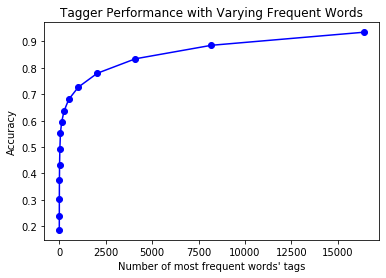

In [39]:
display()     
# Using top 2500 frequently used words' tags could acheive 80% accuracy for tagging the whole corpora

## Evaluate Tagger performance
- train a unigram tagger, use it to tag a sentence, then evaluate
- idea: for each token, assign the most likely / frequent tag

In [40]:
brown_sents = brown.sents(categories='news')

# Train/Initialize a unigram tagger using the tagged brown corpora
# Training process: store the most frequent tag for each word
brown_tagged_sents = brown.tagged_sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)

# apply the unigram tagger to tag a sentence
print(unigram_tagger.tag(brown_sents[2007]))

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'QL'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]


In [41]:
# evaluate the pre-trained unigram tagger
# same training and testing data, possibility of overfitting
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

### Separate Training and Testing Data
- problems with same training and testing data:
    - the tagger simply memorize the training data and made no attempt to construct a general model
    - good performance but useless for new text
- train and test split
    - 90% training
    - 10% testing

In [42]:
train_size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:train_size]
test_sents = brown_tagged_sents[train_size:]

# build the tagger only using training data
unigram_tagger = nltk.UnigramTagger(train_sents)

# evaluate the tagger on testing data
unigram_tagger.evaluate(test_sents)

# better reflects the usefulness of this tagger on unseen text

0.8121200039868434

## General N-Gram Tagging
- A word might have multiple POS tags:
    - book the ticket (Verb)
    - book of the century (Noun)
 
- A word's POS tag depends on the context it appears

<br>

- N-gram: contiguous sequence of n tokens
    - 1-gram: unigram, the current token itself
    - 2-gram: bigram, two tokens
    - 3-gram: trigram, three tokens

<br>

- Unigram tagger
    - assign each word with its most likely tag
    - a word will have same tag regardless of the context it appears
    - only consider the current token, isolation from the context


- N-gram tagger
    - considers both the current token and the POS tags of the n-1 preceding tokens
    - consider contexts that inside a sentence, not cross sentence boundary
    - an n-gram tagger picks the tag that is most likely in the given context
    - e.g., 3-gram tagger: the tag of two preceding words and the word itself
    

<img src="./ngram_tag.png" width="600" align="left">

Train a **bigram tagger**:
    - learn a lookup table to record the frequency of bigrams in the training data
    - "two old men bet on the game"
    - "book a ticket"
    - "the book of the century"

<img src="./Lookup_table_2.png" width="500" align="left"> 

In [43]:
# train a bigram tagger using the pre-tagged training sentences from brown corpus
bigram_tagger = nltk.BigramTagger(train_sents) 

In [44]:
# performance on a training sentence, the tagger has seen this sentence during training
print(bigram_tagger.tag(brown_sents[2007]))

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'CS'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]


In [45]:
# performance on unseen sentence
unseen_sent = brown_sents[4203]
print(bigram_tagger.tag(unseen_sent))

[('The', 'AT'), ('population', 'NN'), ('of', 'IN'), ('the', 'AT'), ('Congo', 'NP'), ('is', 'BEZ'), ('13.5', None), ('million', None), (',', None), ('divided', None), ('into', None), ('at', None), ('least', None), ('seven', None), ('major', None), ('``', None), ('culture', None), ('clusters', None), ("''", None), ('and', None), ('innumerable', None), ('tribes', None), ('speaking', None), ('400', None), ('separate', None), ('dialects', None), ('.', None)]


In [46]:
# evaluate performance on test data (unseen sentences)
bigram_tagger.evaluate(test_sents)

0.10206319146815508

**Conclusion**:
- the bigram tagger has **low accuracy on unseen sentences** (many words are tagged None)
- unable to tag unseen words (e.g., 13.5)
- unable to tag seen words that appear in unseen bigrams
    - have seen the word: million
    - never seen a bigram that: the previous word before "million" has "None" tag
    - fails to tag the rest of the sentence
    
**Sparse data problem**:
- larger n, less chance that the tagger has seen the n-gram tags in training data, less accuracy
- **trade-off** between accuracy and coverage of the result

<br>
<br>
<br>

### Combine several n-gram taggers
- to address the **trade-off** between accuracy and coverage: 
    - use more accurate algorithms when we can (larger n-gram)
    - but to fall back on algorithms with wider coverage when necessary (smaller n-gram)

<br>

- combine the results of a unigram tagger, a bigram tagger, and a default tagger:
    - try tagging the token with the bigram tagger
    - if the bigram tagger is unable to find a tag for the token, try the unigram tagger
    - if the unigram tagger is also unable to find a tag, use a default tagger

<br>


- specify a backoff-tagger and the backoff-tagger may itself have a backoff tagger
    - take advantage of the backoff tagger (expand performance coverage)

In [47]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
print(t0.evaluate(test_sents))
print(t1.evaluate(test_sents))
print(t2.evaluate(test_sents))

0.1262832652247583
0.8361407355726104
0.8452108043456593


## Tagging Unknown Words
- OOV: out-of-vocabulary
- backoff to:
    - regular-expression (e.g., ed, ing, s)
    - default tagger (most frequent tag)
    - not utilizing context
  
<br>

- How to tag unknown words based on the context?
    - limit the vocabulary of a tagger to the most frequent n words
    - replace every other word with a special symbol "UNK"
    - the tagger will learn a POS tag for "UNK" during training
    - e.g. "to perform" -> "to UNK": (to, TO), (UNK, verb)

## Storing pre-trained Taggers
- save a trained a tagger for later re-use

In [48]:
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output)
output.close()

Load the previously saved tagger

In [49]:
from pickle import load
input = open('t2.pkl', 'rb')
tagger = load(input)
input.close()

In [50]:
# Re-use the pre-trained tagger for new sentences
test = """The board's action shows what free enterprise is up against in our complex maze of regulatory laws ."""
tokens = test.split()
print(tagger.tag(tokens))

[('The', 'AT'), ("board's", 'NN$'), ('action', 'NN'), ('shows', 'NNS'), ('what', 'WDT'), ('free', 'JJ'), ('enterprise', 'NN'), ('is', 'BEZ'), ('up', 'RP'), ('against', 'IN'), ('in', 'IN'), ('our', 'PP$'), ('complex', 'JJ'), ('maze', 'NN'), ('of', 'IN'), ('regulatory', 'NN'), ('laws', 'NNS'), ('.', '.')]
